In [77]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt

In [78]:
X, y = make_classification(n_samples=50, n_features=5, n_classes = 4, n_clusters_per_class = 1, random_state=42)
display(X, y)

array([[-1.16921533,  1.14486264, -0.97468167,  1.58307723, -0.69470526],
       [-0.84888286,  1.10091916, -0.82068232,  1.21524433, -0.53209848],
       [-0.48847035,  0.78204653, -1.1913035 ,  0.7355718 , -0.3214526 ],
       [-0.79960192, -0.33941174, -0.91942423,  0.80846457, -0.35973157],
       [ 0.54044388, -0.78331588, -0.03471177, -0.79382063,  0.34723296],
       [ 0.24881193, -1.07161518,  1.40279431, -0.53914228,  0.23294034],
       [ 1.43008446,  0.95897538,  0.25988279, -1.35996395,  0.60720389],
       [ 0.07012303,  0.58263943,  0.65655361,  0.06415523, -0.02528017],
       [ 1.50381595, -1.84430824, -1.16867804, -2.12694133,  0.93173008],
       [-0.49308676,  0.84753652,  0.29307247,  0.75671589, -0.33046234],
       [-2.10922529,  1.85478373,  0.2322537 ,  2.80439509, -1.23158752],
       [-0.26098803, -0.31725458,  0.06856297,  0.21344413, -0.09619309],
       [ 2.1625167 ,  2.45690167,  0.25049285, -1.81054868,  0.8147069 ],
       [ 4.02272665,  2.47468454,  0.3

array([3, 3, 3, 1, 0, 0, 2, 3, 0, 3, 3, 1, 2, 2, 0, 2, 0, 2, 0, 0, 3, 1,
       3, 2, 3, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       2, 1, 3, 2, 3, 3])

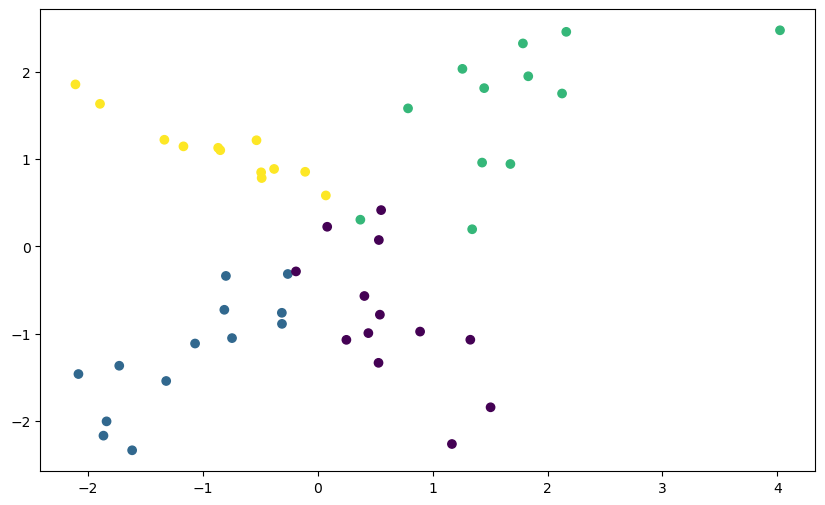

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [80]:
class MulticlassLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iter=1000):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.weights = None  # Списком весов для каждого класса
        self.classes = None  # Список уникальных классов

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def gradient_logloss(self, y_true, x, w):
        y_pred = self.sigmoid(x @ w)
        return x.T @ (y_pred - y_true)

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Нормализация для стабильности
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        self.classes = np.unique(y)  # Уникальные классы
        self.weights = []  # Инициализация списка весов

        # Добавляем столбец единиц
        X = np.c_[np.ones(len(X)), X]

        for c in self.classes:
            # Создаем метки для бинарной классификации (1 для класса c, 0 для остальных)
            y_binary = (y == c).astype(int)

            # Инициализация весов
            w = np.zeros(X.shape[1])

            # Градиентный спуск
            for _ in range(self.num_iter):
                grad_w = self.gradient_logloss(y_binary, X, w)
                w -= self.learning_rate * grad_w

            # Сохраняем веса для текущего класса
            self.weights.append(w)

    def predict(self, X):
        # Добавляем столбец единиц
        X = np.c_[np.ones(len(X)), X]
        logits = np.dot(X, np.transpose(self.weights))
        y_pred = self._softmax(logits)
        return np.argmax(y_pred, axis=1)

In [81]:
model = MulticlassLogisticRegression(learning_rate=0.1, num_iter=1000)
model.fit(X, y)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Точность нашей модели: {accuracy}")

Точность нашей модели: 0.92


In [82]:
sklearn_model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, random_state=42)
sklearn_model.fit(X, y)
y_pred_sklearn = sklearn_model.predict(X)
accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Точность модели sklearn: {accuracy_sklearn}")

Точность модели sklearn: 0.92
